In [51]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt  
%matplotlib inline

In [52]:
df = pd.read_csv("C:/Users/Admin.DESKTOP-Q9CVR13/Desktop/DataSet imarticus/PYTHON/Day 10 Decision Tree/car_evaluation.csv")

In [53]:
df

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [55]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names
col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [56]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
for col in col_names:
    print(df[col].value_counts())

high     432
med      432
low      432
vhigh    431
Name: buying, dtype: int64
high     432
med      432
low      432
vhigh    431
Name: maint, dtype: int64
3        432
4        432
5more    432
2        431
Name: doors, dtype: int64
4       576
more    576
2       575
Name: persons, dtype: int64
med      576
big      576
small    575
Name: lug_boot, dtype: int64
med     576
high    576
low     575
Name: safety, dtype: int64
unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64


In [57]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [58]:
X = df.drop(['class'],axis=1)
y = df['class']

In [59]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=1)

In [60]:
pip install category-encoders

Note: you may need to restart the kernel to use updated packages.


In [61]:
import category_encoders as ce

In [62]:
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [63]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
1353,1,1,1,1,1,1
1610,1,2,2,2,2,2
1176,2,2,2,3,3,1
239,3,2,3,2,3,2
350,3,3,4,1,2,2


In [64]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
1424,1,4,3,2,1,2
592,4,4,4,2,3,3
625,4,4,2,1,1,3
927,2,1,1,3,2,1
730,4,2,2,1,2,3


In [65]:
from sklearn.tree import DecisionTreeClassifier

In [66]:
# instantiate the DecisionTreeClassifier model with criterion gini index
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0) #if we give depth as 5 then more chance of overfitiing
# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [67]:
y_pred_gini = clf_gini.predict(X_test)

In [68]:
from sklearn.metrics import accuracy_score
print('Model accuracy with  gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy with  gini index: 0.7561


In [69]:
y_pred_train_gini = clf_gini.predict(X_train)
y_pred_train_gini

array(['unacc', 'unacc', 'acc', ..., 'acc', 'acc', 'unacc'], dtype=object)

In [70]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.7882


In [71]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.7882
Test set score: 0.7561


[Text(251.10000000000002, 380.52, 'X[3] <= 1.5\ngini = 0.449\nsamples = 1157\nvalue = [259, 45, 817, 36]'),
 Text(167.4, 271.8, 'gini = 0.0\nsamples = 387\nvalue = [0, 0, 387, 0]'),
 Text(334.8, 271.8, 'X[5] <= 2.5\ngini = 0.569\nsamples = 770\nvalue = [259, 45, 430, 36]'),
 Text(167.4, 163.07999999999998, 'X[5] <= 1.5\ngini = 0.429\nsamples = 517\nvalue = [119, 27, 371, 0]'),
 Text(83.7, 54.360000000000014, 'gini = 0.589\nsamples = 251\nvalue = [119, 27, 105, 0]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 266\nvalue = [0, 0, 266, 0]'),
 Text(502.20000000000005, 163.07999999999998, 'X[0] <= 2.5\ngini = 0.614\nsamples = 253\nvalue = [140, 18, 59, 36]'),
 Text(418.5, 54.360000000000014, 'gini = 0.616\nsamples = 125\nvalue = [66, 18, 5, 36]'),
 Text(585.9, 54.360000000000014, 'gini = 0.488\nsamples = 128\nvalue = [74, 0, 54, 0]')]

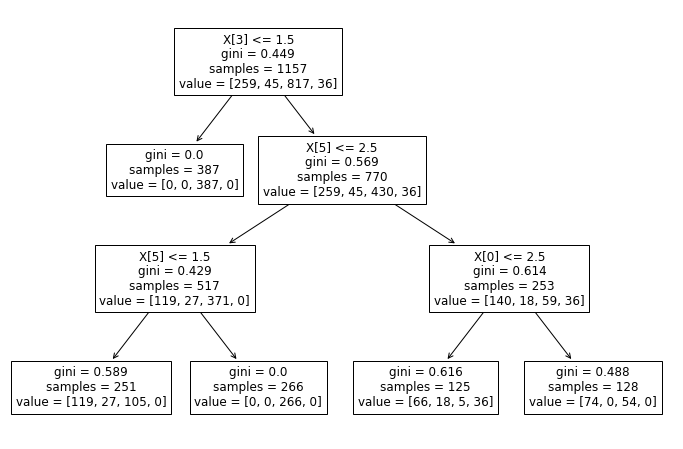

In [72]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf_gini.fit(X_train,y_train))

In [73]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [74]:
import graphviz

In [75]:
dot_data = tree.export_graphviz(clf_gini, out_file=None, feature_names=X_train.columns,  class_names=y_train, filled=True, rounded=True, special_characters=True)

graph = graphviz.Source(dot_data) 

graph

KeyError: 0